In [1]:
from preprocessing_functions import *
from topic_modeling_functions import *

import warnings
warnings.filterwarnings('ignore')

C:\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\venv_citynet3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


### Import Lemmatised Paragraphs

In [8]:
INPUT_DIR = "../../../../../data/clean/city_pair_paragraphs3/"
BATCHES = [5, 10, 20, 30]
POS = ["NOUN", "VERB", "ADJ"]
ONLY_ENGLISH_WORDS = True
sort_by_paragraphs_count = True
merged_POS = True

data_list = import_lemmatised_paragraphs(INPUT_DIR, POS, BATCHES, ONLY_ENGLISH_WORDS=ONLY_ENGLISH_WORDS, merged_POS=merged_POS, sort_by_paragraphs=sort_by_paragraphs_count)

BATCHES: ['5', '10', '20', '30']:   0%|          | 0/4 [00:00<?, ?it/s]

City Pair:   0%|          | 0/35 [00:00<?, ?it/s]

City Pair:   0%|          | 0/145 [00:00<?, ?it/s]

City Pair:   0%|          | 0/244 [00:00<?, ?it/s]

City Pair:   0%|          | 0/10 [00:00<?, ?it/s]

### Create Single Dataframe

In [11]:
frames = [citypair['lemmatized_paragraphs'] for citypair in data_list]
citypairs = [citypair['city_pair'] for citypair in data_list]

result = pd.concat(frames) #, keys=citypairs)
result.set_index('paragraph_id', inplace=True)
result.sort_index(inplace=True)
result.reset_index(inplace=True)
result

,paragraph_id,city_pair,paragraph,merged_POS
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide..."
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group..."
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci..."
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo..."
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde..."
...,...,...,...,...
310823,312682,warsaw_valencia,"since 2010, edelmann has intensified his conce...","[concert, activity, guest, performance, recita..."
310824,312683,warsaw_valencia,"born maria mokrzycka in lviv (now ukraine), sh...","[conservatory, debut, opera, opera, time, bari..."
310825,312684,warsaw_valencia,ayala was elected a fellow of the american aca...,"[fellow, art, science, member, society, member..."
310826,312685,warsaw_valencia,o'conor was a co-founder of the dublin interna...,"[co, founder, competition, director, chairman,..."


In [29]:
TOPIC_SELECTION = range(6, 7,1)
list(TOPIC_SELECTION)

[6]

### Training Multiple LDA Models

In [30]:
%%time

# TOPIC_SELECTION = range(2,21, 1)
paragraphs = result.merged_POS
MIN_DF = 1
MAX_DF = 1.0

# Vectorization
dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

models = compare_lda_models(OUTPUT_DIR='../../../../../data/clean/lda_models/300k_paragraphs/', TOPIC_SELECTION=TOPIC_SELECTION,
                LEMMATIZED_TEXT=paragraphs, DICTIONARY=dictionary, CORPUS=corpus, MIN_DF=MIN_DF, MAX_DF=MAX_DF, N_ITERATIONS=1000,
                PATH_TO_MALLET=r'C:/mallet/bin/mallet.bat', GET_COHERENCE_SCORE=True, COHERENCE='c_v')

Creating lda models for the following number of topics: [6].


Creating models...:   0%|          | 0/1 [00:00<?, ?it/s]

topics: 6, MIN_DF: 1, MAX_DF: 1.0
coherence_score: 0.6633643241333064
Model has been saved to the following location: ../../../../../data/clean/lda_models/300k_paragraphs/lda_model_6topics_1min_1_0max.
CPU times: total: 2min 15s
Wall time: 10min 59s


### Load Desired Model

In [33]:
path = "../../../../../data/clean/lda_models/300k_paragraphs/lda_model_6topics_0_05min_0_9max/"
forced_path = os.path.abspath(path)

model = load_lda_model(forced_path, LOAD_VIS=True, LOAD_DICT=True, LOAD_TEXTS=True, LOAD_COHERENCE_SCORE=True)

In [36]:
print(model['coherence_score'])
model['visualisation']

0.6633643241333066


### Word Topic Distribution

In [42]:
N_TOPICS = len(model['model'].get_topics())
MAX_WORDS = 8

for i in range(N_TOPICS):
    topic_words = model['model'].show_topic(i, topn=MAX_WORDS)
    print(i+1, [(x[0], round(x[1], 3)) for x in topic_words])
    print()

1 [('win', 0.035), ('final', 0.022), ('season', 0.019), ('club', 0.018), ('team', 0.018), ('play', 0.015), ('match', 0.014), ('game', 0.013)]

2 [('art', 0.035), ('work', 0.026), ('exhibition', 0.016), ('museum', 0.013), ('include', 0.011), ('gallery', 0.011), ('painting', 0.009), ('exhibit', 0.009)]

3 [('war', 0.008), ('german', 0.007), ('year', 0.006), ('time', 0.005), ('return', 0.005), ('city', 0.005), ('government', 0.005), ('leave', 0.004)]

4 [('opera', 0.038), ('festival', 0.024), ('perform', 0.021), ('music', 0.017), ('orchestra', 0.016), ('film', 0.014), ('include', 0.014), ('tour', 0.014)]

5 [('service', 0.016), ('city', 0.015), ('line', 0.012), ('company', 0.011), ('train', 0.011), ('railway', 0.01), ('station', 0.01), ('route', 0.01)]

6 [('study', 0.037), ('bear', 0.019), ('work', 0.017), ('school', 0.017), ('year', 0.015), ('university', 0.012), ('professor', 0.012), ('move', 0.009)]



### Document(=paragraphs) topic distribution

In [46]:
import pandas as pd

transformed_docs = model['model'].load_document_topics()
topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in transformed_docs], 
             columns=['topic_{}'.format(i+1) for i in range(N_TOPICS)])

# Give Topics sensible names
topic_distributions_renamed_cols=topic_distributions.rename(columns = {  'topic_1': 'Sport',
                                        'topic_2': 'Art',
                                        'topic_3': 'Diplomacy',
                                        'topic_4': 'Entertainment',
                                        'topic_5': 'Transportation',
                                        'topic_6': 'Education'}, inplace = False)
topic_distributions_renamed_cols

,Sport,Art,Diplomacy,Entertainment,Transportation,Education
0,0.000765,0.001501,0.770121,0.001536,0.001327,0.224750
1,0.195772,0.498009,0.302968,0.001100,0.000950,0.001201
2,0.000873,0.001713,0.002005,0.001754,0.991741,0.001914
3,0.383249,0.602904,0.003862,0.003379,0.002918,0.003687
4,0.002721,0.005337,0.094386,0.005463,0.886130,0.005962
...,...,...,...,...,...,...
310823,0.001889,0.003704,0.004335,0.982658,0.003276,0.004139
310824,0.000729,0.001430,0.001673,0.993306,0.001264,0.001597
310825,0.001683,0.003300,0.003862,0.003379,0.002918,0.984857
310826,0.001382,0.092213,0.003171,0.584548,0.002396,0.316290


In [52]:
topic_distributions_renamed_cols.idxmax(axis="columns").value_counts()

Entertainment     65366
Diplomacy         57828
Education         55784
Art               52721
Transportation    47008
Sport             32121
dtype: int64

In [50]:
# result.iloc[310827].paragraph

In [59]:
updated_results = pd.concat([result, topic_distributions_renamed_cols],
                  axis = 1)
# updated_results.iloc[310824	].paragraph

In [62]:
updated_results_final =pd.concat([updated_results, updated_results[topic_distributions_renamed_cols.columns].agg(['idxmax','max'],axis=1)], axis=1)
updated_results_final

,paragraph_id,city_pair,paragraph,merged_POS,Sport,Art,Diplomacy,Entertainment,Transportation,Education,idxmax,max
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide...",0.000765,0.001501,0.770121,0.001536,0.001327,0.224750,Diplomacy,0.770121
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group...",0.195772,0.498009,0.302968,0.001100,0.000950,0.001201,Art,0.498009
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",0.000873,0.001713,0.002005,0.001754,0.991741,0.001914,Transportation,0.991741
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo...",0.383249,0.602904,0.003862,0.003379,0.002918,0.003687,Art,0.602904
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",0.002721,0.005337,0.094386,0.005463,0.886130,0.005962,Transportation,0.88613
...,...,...,...,...,...,...,...,...,...,...,...,...
310823,312682,warsaw_valencia,"since 2010, edelmann has intensified his conce...","[concert, activity, guest, performance, recita...",0.001889,0.003704,0.004335,0.982658,0.003276,0.004139,Entertainment,0.982658
310824,312683,warsaw_valencia,"born maria mokrzycka in lviv (now ukraine), sh...","[conservatory, debut, opera, opera, time, bari...",0.000729,0.001430,0.001673,0.993306,0.001264,0.001597,Entertainment,0.993306
310825,312684,warsaw_valencia,ayala was elected a fellow of the american aca...,"[fellow, art, science, member, society, member...",0.001683,0.003300,0.003862,0.003379,0.002918,0.984857,Education,0.984857
310826,312685,warsaw_valencia,o'conor was a co-founder of the dublin interna...,"[co, founder, competition, director, chairman,...",0.001382,0.092213,0.003171,0.584548,0.002396,0.316290,Entertainment,0.584548


In [63]:
updated_results_final.to_csv('classified_435_citypairs_311k_paragraphs.csv', index=False)

In [64]:
updated_results_final['idxmax'].value_counts()

Entertainment     65366
Diplomacy         57828
Education         55784
Art               52721
Transportation    47008
Sport             32121
Name: idxmax, dtype: int64

Text(0, 0.5, 'Density')

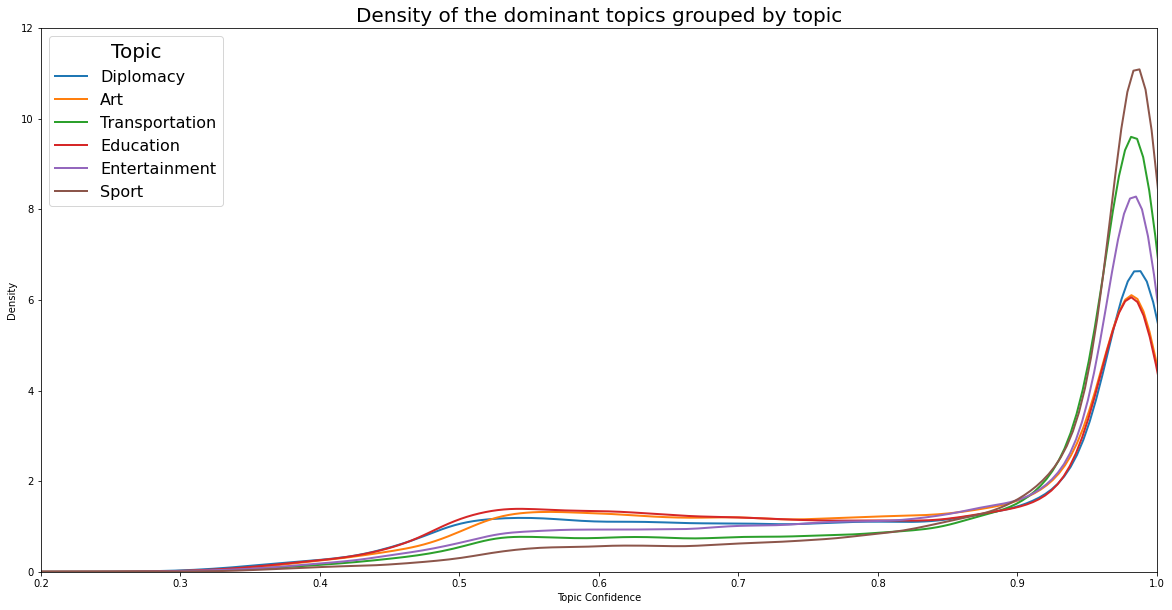

In [121]:
# !pip install seaborn
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20,10))
a = updated_results_final.groupby('idxmax')

# Iterate through the five airlines
for topic in updated_results_final['idxmax'].unique():
    b = a['max'].get_group(topic)
    
    #     b.plot.density(color='green')
    # plt.title('Density plot for Speeding')
    # plt.show()
    
    sns.distplot(b, hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = topic)
    
# Plot formatting

plt.legend(prop={'size': 16}, title = 'Topic', title_fontsize=20)
plt.title('Density of the dominant topics grouped by topic', fontsize=20)
plt.xlabel('Topic Confidence')
plt.ylim(0, 12)
plt.xlim(0.2, 1)
plt.ylabel('Density')

### Different cut off thresholds per topic?

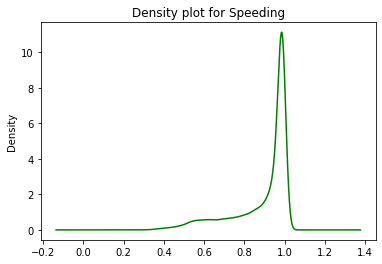

In [79]:
b = a['max'].get_group(topic)    
b.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.show()

<AxesSubplot:xlabel='max', ylabel='Density'>

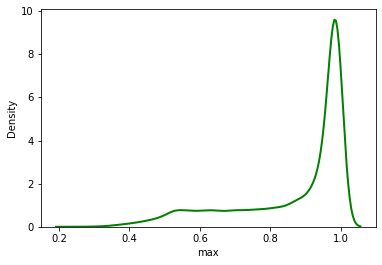

In [120]:
# Density Plot and Histogram of all arrival delays
sns.distplot(b, hist=False, kde=True, 
             bins=100, color = 'green', 
             norm_hist=True, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})